In [5]:
import numpy as np 
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

### From text-book Understandinf recurrent neural networks 
#### A first RNN layer for imdb datasets
### 1. Preprocessing datasets

In [2]:
np.set_printoptions(threshold=sys.maxsize)

### DATA PRE_PROCESSING FOR IMDB DATASETS

In [2]:
max_features = 10000
maxlen = 500 #most common words among top features
batch_size = 32
#training and test datas
(input_train, y_train),(input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), "train sequences")
print(len(input_test), "test sequences")
print(len(y_train), "train labels")
print(len(y_test), "test_labels")

print('pad sequences(samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input train shape:',input_train.shape)
print('input test shape:', input_test.shape)

25000 train sequences
25000 test sequences
25000 train labels
25000 test_labels
pad sequences(samples x time)
input train shape: (25000, 500)
input test shape: (25000, 500)


### DATA PREPROSESSING FOR REUTERS DATASETS

In [12]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#vectorized training & test data and labels
x_train, x_test = vectorize_sequences(train_data), vectorize_sequences(test_data)
one_hot_train_labels,one_hot_test_labels = to_categorical(train_labels),to_categorical(test_labels)

# Validation set
x_val, partial_x_train = x_train[:1000], x_train[1000:]
y_val, partial_y_train = one_hot_train_labels[:1000], one_hot_train_labels[1000:]

### DATA PREPROCESSING FOR BOSTON HOUSING DATASETS

In [6]:
from tensorflow.keras.datasets import boston_housing
import pandas as pd 
import numpy as np
from sklearn import preprocessing

(trainX, trainY),(testX, testY) = boston_housing.load_data()

scaller = preprocessing.StandardScaler()
trainX = scaller.fit_transform(trainX)
testX = scaller.transform(testX)

scallerY = preprocessing.MinMaxScaler()
trainY = scallerY.fit_transform(trainY.reshape(-1,1))

### Graph visualization

In [4]:
def plot(history):
    plt.figure(figsize = (10,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label = 'Training loss')
    plt.plot(history['val_loss'], label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['acc'], label = 'Training accuracy')
    plt.plot(history['val_acc'], label = 'Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()
    
    print('Maximum Training Accuracy:',max(history['acc']), 'Maximum Validation Accuracy', max(history['val_acc']))

### Building model
#### test accuracy 81.52

In [44]:
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features, 32))
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss ='binary_crossentropy', metrics = ["acc"])
hisory = model.fit(input_train, y_train, epochs = 10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 11s 69ms/step - loss: 0.6441 - acc: 0.6101 - val_loss: 0.5321 - val_acc: 0.7314
Epoch 2/10
157/157 [==============================] - 11s 72ms/step - loss: 0.3980 - acc: 0.8293 - val_loss: 0.4357 - val_acc: 0.8058
Epoch 3/10
157/157 [==============================] - 11s 71ms/step - loss: 0.2919 - acc: 0.8835 - val_loss: 0.4169 - val_acc: 0.8180
Epoch 4/10
157/157 [==============================] - 11s 72ms/step - loss: 0.2340 - acc: 0.9086 - val_loss: 0.3923 - val_acc: 0.8514
Epoch 5/10
157/157 [==============================] - 11s 73ms/step - loss: 0.1748 - acc: 0.9359 - val_loss: 0.5574 - val_acc: 0.7530
Epoch 6/10
157/157 [==============================] - 12s 75ms/step - loss: 0.1181 - acc: 0.9582 - val_loss: 0.4007 - val_acc: 0.8642
Epoch 7/10
157/157 [==============================] - 12s 75ms/step - loss: 0.0715 - acc: 0.9773 - val_loss: 0.5874 - val_acc: 0.7902
Epoch 8/10
157/157 [==============================] - 11s 72ms

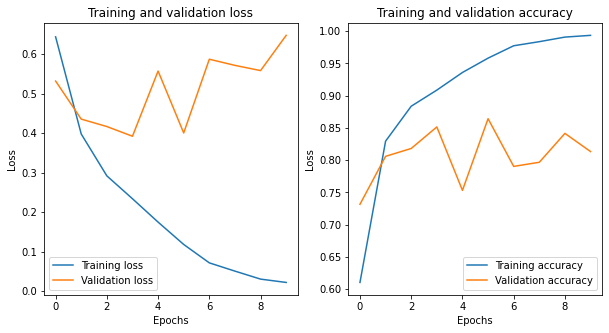

Maximum Training Accuracy: 0.9934999942779541 Maximum Validation Accuracy 0.8641999959945679
782/782 [==============================] - 8s 11ms/step - loss: 0.6445 - acc: 0.8152


[0.6444788575172424, 0.8152400255203247]

In [53]:
plot(hisory.history)
model.evaluate(input_test, y_test)

### Expt 1: Adding more RNN layers
#### test accuracy.85.34

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_20 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_21 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
________________________________________________

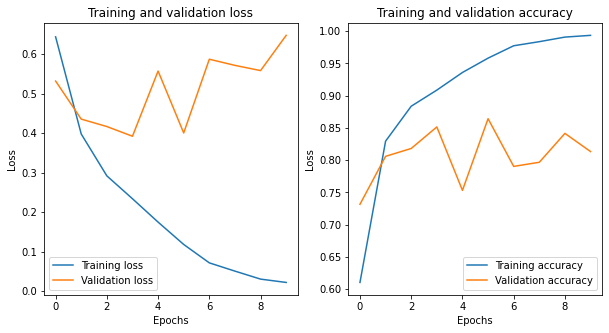

Maximum Training Accuracy: 0.9934999942779541 Maximum Validation Accuracy 0.8641999959945679
782/782 [==============================] - 30s 38ms/step - loss: 0.4373 - acc: 0.8534


[0.4373132288455963, 0.85343998670578]

In [58]:
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features,32))
model.add(tf.keras.layers.SimpleRNN(32, return_sequences= True))
model.add(tf.keras.layers.SimpleRNN(32, return_sequences= True))
model.add(tf.keras.layers.SimpleRNN(32, return_sequences = True))
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy', metrics =['acc'])
history = model.fit(input_train, y_train, epochs = 20, batch_size = 128, validation_split = 0.2)
plot(hisory.history)
model.evaluate(input_test, y_test)

### model = Sequential()
model.add(tf.keras.layers.Embedding(max_features,32))
model.add(tf.keras.layers.SimpleRNN(64, return_sequences= True))
model.add(tf.keras.layers.SimpleRNN(64, return_sequences= True))
model.add(tf.keras.layers.SimpleRNN(64, return_sequences = True))
model.add(tf.keras.layers.SimpleRNN(64))
model.summary()

In [60]:
test_loss,test_acc=model.evaluate(input_test, y_test)
print('Final test accuracy.{}%'.format(test_acc*100))

782/782 [==============================] - 30s 38ms/step - loss: 0.4373 - acc: 0.8534
Final test accuracy.85.343998670578%


### Expt:2 Increasing Embedding layer and RNN to 64
#### test accuracy.81.85

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_22 (SimpleRNN)    (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_23 (SimpleRNN)    (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_24 (SimpleRNN)    (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_25 (SimpleRNN)    (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
________________________________________________

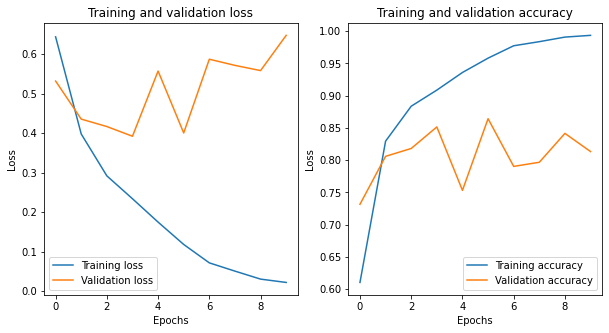

Maximum Training Accuracy: 0.9934999942779541 Maximum Validation Accuracy 0.8641999959945679
782/782 [==============================] - 41s 53ms/step - loss: 0.8066 - acc: 0.8186


[0.8066496849060059, 0.8185999989509583]

In [61]:
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features,64))
model.add(tf.keras.layers.SimpleRNN(64, return_sequences= True))
model.add(tf.keras.layers.SimpleRNN(64, return_sequences= True))
model.add(tf.keras.layers.SimpleRNN(64, return_sequences = True))
model.add(tf.keras.layers.SimpleRNN(64))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy', metrics =['acc'])
history = model.fit(input_train, y_train, epochs = 20, batch_size = 128, validation_split = 0.2, verbose=0)
plot(hisory.history)
model.evaluate(input_test, y_test)

In [62]:
test_loss,test_acc=model.evaluate(input_test, y_test)
print('Final test accuracy.{}%'.format(test_acc*100))

782/782 [==============================] - 42s 53ms/step - loss: 0.8066 - acc: 0.8186
Final test accuracy.81.85999989509583%


### Expt 3: Adding dropout layers
#### test accuracy :84.61

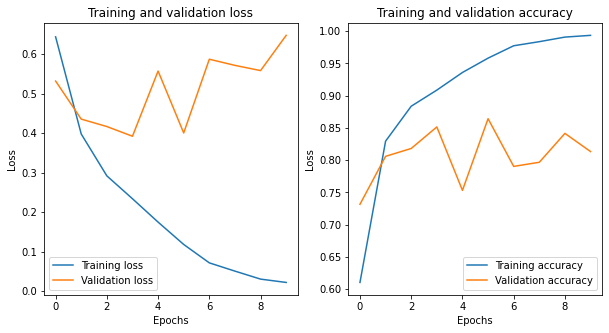

Maximum Training Accuracy: 0.9934999942779541 Maximum Validation Accuracy 0.8641999959945679
782/782 [==============================] - 41s 52ms/step - loss: 0.5451 - acc: 0.8462
Final test accuracy.84.61599946022034%


In [64]:
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features,64))
model.add(tf.keras.layers.SimpleRNN(64, return_sequences= True, recurrent_dropout=0.1, dropout=0.1))
model.add(tf.keras.layers.SimpleRNN(64, return_sequences= True, recurrent_dropout=0.1, dropout=0.1))
model.add(tf.keras.layers.SimpleRNN(64, return_sequences = True, recurrent_dropout=0.1, dropout=0.1))
model.add(tf.keras.layers.SimpleRNN(64, recurrent_dropout=0.1, dropout=0.1))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy', metrics =['acc'])
history = model.fit(input_train, y_train, epochs = 20, batch_size = 128, validation_split = 0.2, verbose=0)
plot(hisory.history)
test_loss,test_acc=model.evaluate(input_test, y_test)
print('Final test accuracy.{}%'.format(test_acc*100))

### Expt 4: Using LSTM

#### test accuracy :84.80%

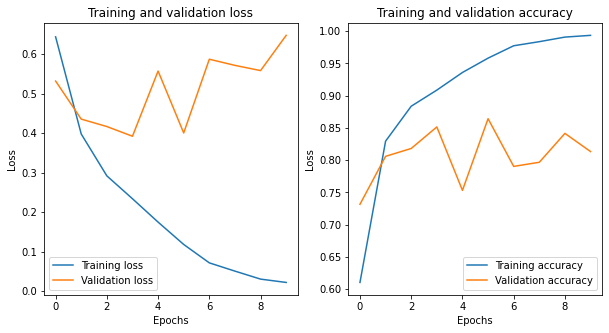

Maximum Training Accuracy: 0.9934999942779541 Maximum Validation Accuracy 0.8641999959945679
782/782 [==============================] - 20s 25ms/step - loss: 0.4139 - acc: 0.8480
Final test accuracy.84.8039984703064%


In [67]:
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features, 128))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),loss='binary_crossentropy', metrics =['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2, verbose=0)
plot(hisory.history)
test_loss,test_acc=model.evaluate(input_test, y_test)
print('Final test accuracy.{}%'.format(test_acc*100))

### Expt 5: With Embedding unit 64
#### test accuracy: 83.76

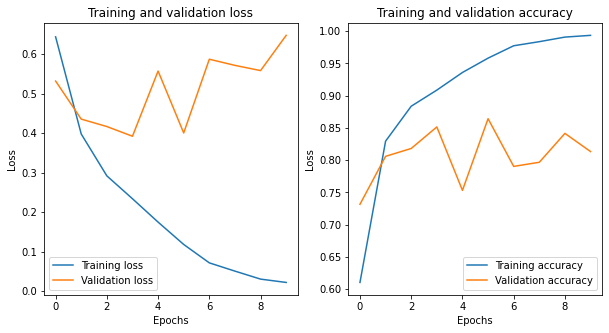

Maximum Training Accuracy: 0.9934999942779541 Maximum Validation Accuracy 0.8641999959945679
782/782 [==============================] - 17s 21ms/step - loss: 0.3875 - acc: 0.8376
Final test accuracy.83.76399874687195%


In [69]:
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features, 64))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),loss='binary_crossentropy', metrics =['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2, verbose=0)
plot(hisory.history)
test_loss,test_acc=model.evaluate(input_test, y_test)
print('Final test accuracy.{}%'.format(test_acc*100))

###  Expt 6: With Embedding unit 32
#### test accuracy: 85.24

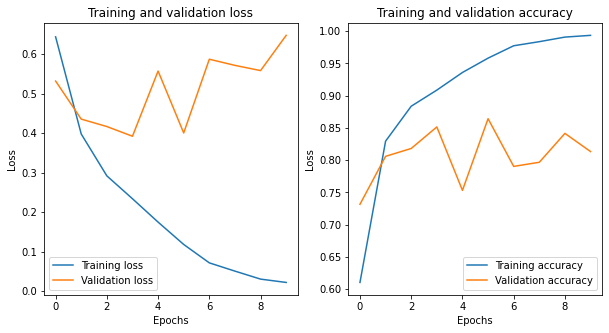

Maximum Training Accuracy: 0.9934999942779541 Maximum Validation Accuracy 0.8641999959945679
782/782 [==============================] - 16s 21ms/step - loss: 0.5080 - acc: 0.8596
Final test accuracy.85.96400022506714%


In [82]:
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features, 32))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),loss='binary_crossentropy', metrics =['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2, verbose=0)
plot(hisory.history)
test_loss,test_acc=model.evaluate(input_test, y_test)
print('Final test accuracy.{}%'.format(test_acc*100))

### Using shallow LSTM layer

### Using GRU

### Expt 7: adding bidirectional LSTM
#### Test accuracy : 86.16%

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, None, 128)         1280000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
Total params: 1,477,761
Trainable params: 1,477,761
Non-trainable params: 0
_________________________________________________________________


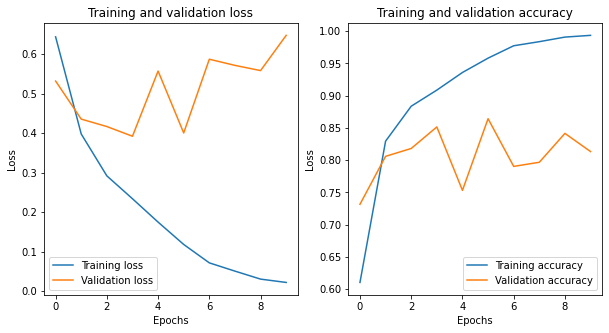

Maximum Training Accuracy: 0.9934999942779541 Maximum Validation Accuracy 0.8641999959945679
782/782 [==============================] - 65s 83ms/step - loss: 0.5576 - acc: 0.8616
Final test accuracy.86.16399765014648%


In [95]:
#inputs = keras.Input(shape=(None,), dtype="int32")
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features,128))
#add 2 bidirectional LSTMs
model.add(tf.keras.layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(layers.LSTM(64)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),loss='binary_crossentropy', metrics =['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2, verbose=0)
plot(hisory.history)
test_loss,test_acc=model.evaluate(input_test, y_test)
print('Final test accuracy.{}%'.format(test_acc*100))

### Expt 8: Using 1 bidirectional layer
#### TEST ACCURACY : 86.81%

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, None, 128)         1280000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 62s 396ms/step - loss: 0.5089 - acc: 0.7566 - val_loss: 0.4244 - val_acc: 0.8174
Epoch 2/10
157/157 [==============================] - 62s 394ms/step - loss: 0.3046 - acc: 0.8794 - val_loss: 0.2904 - val_acc: 0.8814
Epoch 3/10
157/157 [==============================] - 64s 405ms/step - loss: 0.2404 - acc: 0.9077 - val

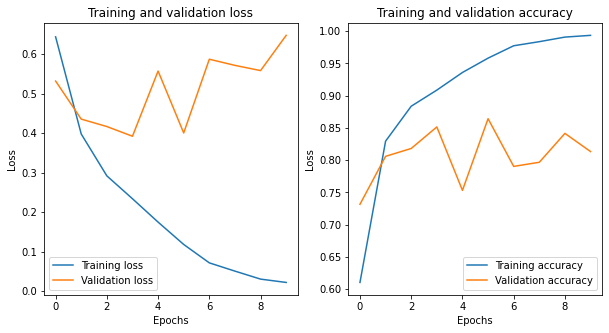

Maximum Training Accuracy: 0.9934999942779541 Maximum Validation Accuracy 0.8641999959945679
782/782 [==============================] - 32s 40ms/step - loss: 0.4246 - acc: 0.8682
Final test accuracy.86.81600093841553%


In [96]:
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features,128))
#add 1 bidirectional LSTMs
model.add(tf.keras.layers.Bidirectional(layers.LSTM(64)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),loss='binary_crossentropy', metrics =['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)
plot(hisory.history)
test_loss,test_acc=model.evaluate(input_test, y_test)
print('Final test accuracy.{}%'.format(test_acc*100))

### Expt 9: Increasing embedding layer and LSTM layer units to [516-128]
#### test accuracy : 86.12%

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, None, 516)         5160000   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               660480    
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 257       
Total params: 5,820,737
Trainable params: 5,820,737
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 309s 2s/step - loss: 0.4837 - acc: 0.7697 - val_loss: 0.4324 - val_acc: 0.7980
Epoch 2/10
157/157 [==============================] - 303s 2s/step - loss: 0.3159 - acc: 0.8745 - val_loss: 0.3362 - val_acc: 0.8578
Epoch 3/10
157/157 [==============================] - 301s 2s/step - loss: 0.2528 - acc: 0.9036 - val_loss:

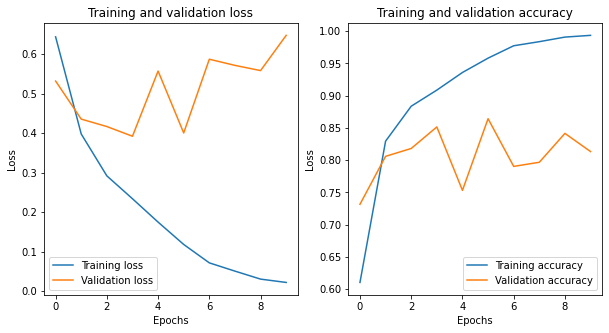

Maximum Training Accuracy: 0.9934999942779541 Maximum Validation Accuracy 0.8641999959945679
782/782 [==============================] - 158s 203ms/step - loss: 0.5258 - acc: 0.8613
Final test accuracy.86.12800240516663%


In [99]:
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features,516))
#add 1 bidirectional LSTMs
model.add(tf.keras.layers.Bidirectional(layers.LSTM(128)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),loss='binary_crossentropy', metrics =['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)
plot(hisory.history)
test_loss,test_acc=model.evaluate(input_test, y_test)
print('Final test accuracy.{}%'.format(test_acc*100))

###  Expt 10: Increasing learning rate to 0.00001 
#### test accuracy : 87.70%
<b> BEST ACCURACY </b>

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, None, 516)         5160000   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 256)               660480    
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 257       
Total params: 5,820,737
Trainable params: 5,820,737
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
98/98 [==============================] - 228s 2s/step - loss: 0.6769 - acc: 0.5994 - val_loss: 0.6395 - val_acc: 0.6588
Epoch 2/10
98/98 [==============================] - 227s 2s/step - loss: 0.5441 - acc: 0.7564 - val_loss: 0.5402 - val_acc: 0.7213
Epoch 3/10
98/98 [==============================] - 228s 2s/step - loss: 0.4317 - acc: 0.8254 - val_loss: 0.393

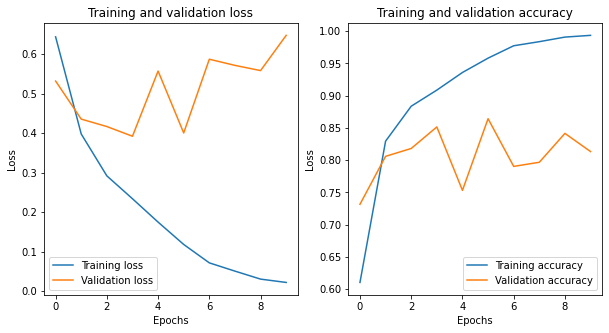

Maximum Training Accuracy: 0.9934999942779541 Maximum Validation Accuracy 0.8641999959945679
782/782 [==============================] - 160s 204ms/step - loss: 0.3017 - acc: 0.8770
Final test accuracy.87.70400285720825%


In [100]:
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features,516))
#add 1 bidirectional LSTMs
model.add(tf.keras.layers.Bidirectional(layers.LSTM(128)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy', metrics =['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.5)
plot(hisory.history)
test_loss,test_acc=model.evaluate(input_test, y_test)
print('Final test accuracy.{}%'.format(test_acc*100))

### Expt 11: The Reuters Dataset 
### Using SimpleRNN of 64 unit
#### test accuracy: 36%

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 103s 13ms/sample - loss: 2.7755 - acc: 0.3213 - val_loss: 2.4158 - val_acc: 0.3540
Epoch 2/10
7982/7982 [==============================] - 102s 13ms/sample - loss: 2.4183 - acc: 0.3514 - val_loss: 2.3902 - val_acc: 0.3540
Epoch 3/10
7982/7982 [==============================] - 117s 15ms/sample - loss: 2.4086 - acc: 0.3514 - val_loss: 2.3888 - val_acc: 0.3540
Epoch 4/10
7982/7982 [==============================] - 120s 15ms/sample - loss: 2.4069 - acc: 0.3514 - val_loss: 2.3872 - val_acc: 0.3540
Epoch 5/10
7982/7982 [==============================] - 108s 14ms/sample - loss: 2.4068 - acc: 0.3514 - val_loss: 2.3875 - val_acc: 0.3540
Epoch 6/10
7982/7982 [==============================] - 106s 13ms/sample - loss: 2.4071 - acc: 0.3514 - val_loss: 2.3878 - val_acc: 0.3540
Epoch 7/10
7982/7982 [==============================] - 110s 14ms/sample - loss: 2.4064 - acc: 0.3514 - val_loss: 2.38

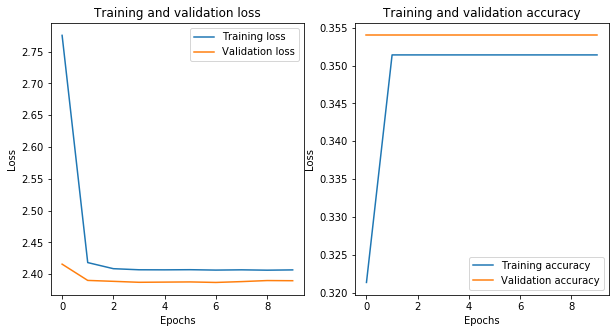

Maximum Training Accuracy: 0.3514157 Maximum Validation Accuracy 0.354
2246/2246 [==============================] - 19s 8ms/sample - loss: 2.4150 - acc: 0.3620
Maximum test Accuracy: [2.4150257700803763, 0.36197686]


In [6]:
model = Sequential()
model.add(tf.keras.layers.Embedding(10000, 64))
model.add(tf.keras.layers.SimpleRNN(64))
model.add(tf.keras.layers.Dense(46, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adamax(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val))
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

###  Expt 12: Reuters, Using 2 SimpleRNN layers 
#### test accuracy :36.19%

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 229s 29ms/sample - loss: 2.6727 - acc: 0.3163 - val_loss: 2.3982 - val_acc: 0.3540
Epoch 2/10
7982/7982 [==============================] - 224s 28ms/sample - loss: 2.4140 - acc: 0.3514 - val_loss: 2.3919 - val_acc: 0.3540
Epoch 3/10
7982/7982 [==============================] - 219s 27ms/sample - loss: 2.4086 - acc: 0.3514 - val_loss: 2.3889 - val_acc: 0.3540
Epoch 4/10
7982/7982 [==============================] - 211s 26ms/sample - loss: 2.4078 - acc: 0.3514 - val_loss: 2.3898 - val_acc: 0.3540
Epoch 5/10
7982/7982 [==============================] - 227s 28ms/sample - loss: 2.4078 - acc: 0.3514 - val_loss: 2.3879 - val_acc: 0.3540
Epoch 6/10
7982/7982 [==============================] - 225s 28ms/sample - loss: 2.4072 - acc: 0.3514 - val_loss: 2.3895 - val_acc: 0.3540
Epoch 7/10
7982/7982 [==============================] - 219s 27ms/sample - loss: 2.4069 - acc: 0.3514 - val_loss: 2.38

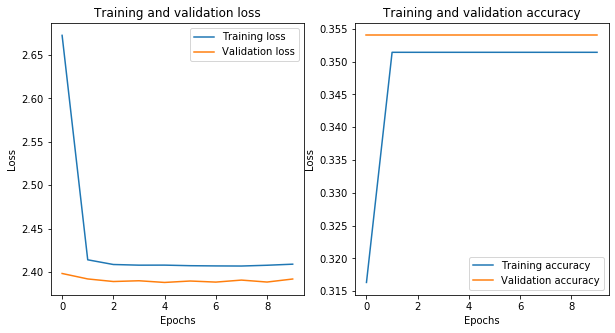

Maximum Training Accuracy: 0.3514157 Maximum Validation Accuracy 0.354
2246/2246 [==============================] - 43s 19ms/sample - loss: 2.4182 - acc: 0.3620
Maximum test Accuracy: 0.36197686


In [13]:
model = Sequential()
model.add(tf.keras.layers.Embedding(10000, 64))
model.add(tf.keras.layers.SimpleRNN(64,return_sequences = True ))
model.add(tf.keras.layers.SimpleRNN(64))
model.add(tf.keras.layers.Dense(46, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adamax(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val))
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results[1])

### EXPT 13: Reuters, using Simple RNN with validation split
#### test accuracy 36.19%

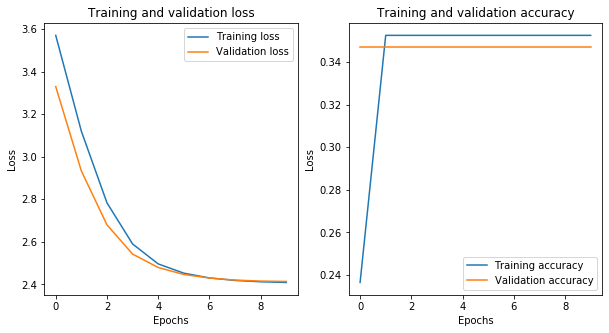

Maximum Training Accuracy: 0.35254502 Maximum Validation Accuracy 0.34690043
2246/2246 [==============================] - 29s 13ms/sample - loss: 2.4177 - acc: 0.3620
Maximum test Accuracy: 0.36197686


In [44]:
model = Sequential()
model.add(tf.keras.layers.Embedding(10000, 128))
model.add(tf.keras.layers.SimpleRNN(64))
model.add(tf.keras.layers.Dense(46, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 10, batch_size = 128, validation_split = 0.2, verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results[1])

### EXPT 14: The Boston house price

In [7]:

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

x_train=x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test=x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [8]:
def plot(all_mae_histories, num_epochs=500):
    average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    
    plt.clf() 
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.title('average of the per-epoch MAE scores for all folds')
    
    plt.show()
    
def k_fold_val(model, k = 4, num_epochs = 500, batchsize = 64, lrate=None):
    num_val_samples = len(x_train) // k
    all_val_mae = []
    all_training_mae = []
    for i in range(k):
        val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
        
        partial_train_data = np.concatenate([x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]], 
                                            axis=0)
        partial_train_targets = np.concatenate([y_train[:i * num_val_samples],
                                                y_train[(i + 1) * num_val_samples:]],axis=0)
        
        history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, 
                            batch_size=batchsize, verbose=0, callbacks=lrate)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_val_mae.append(val_mae)
        all_training_mae.append(history.history['mae'])
    
    plot(all_training_mae,num_epochs = num_epochs)
    return np.mean(all_val_mae)

### EXPT 14 Using SimpleRnn
#### mae: 3.55

<Figure size 432x288 with 0 Axes>

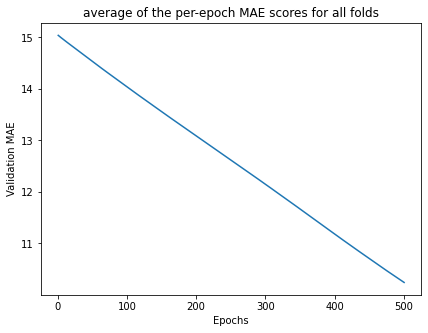

mae:  3.5514490604400635


In [17]:
model = Sequential()
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer= tf.keras.optimizers.RMSprop(lr = 0.0001), loss='mse', metrics=['mae'])
mean_score = k_fold_val(model)

results = model.evaluate(x_test, y_test, verbose=0)
print('mae: ', results[1])

### EXPT 15: Using LSTM of 32 unit
#### mae:  6.71

<Figure size 432x288 with 0 Axes>

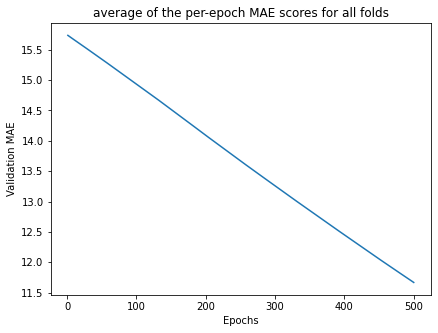

mae:  6.718703269958496


In [16]:
model = Sequential()
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer= tf.keras.optimizers.RMSprop(lr = 0.0001), loss='mse', metrics=['mae'])
mean_score = k_fold_val(model)

results = model.evaluate(x_test, y_test, verbose=0)
print('mae: ', results[1])

### EXPT 16: Using SimpleRnn of 32 unit
#### mae:  3.74

<Figure size 432x288 with 0 Axes>

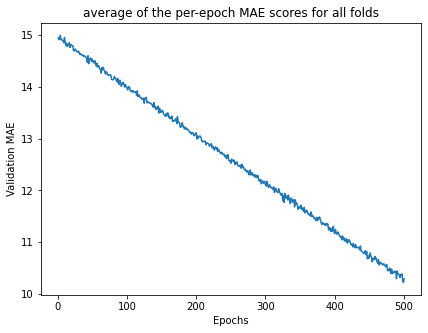

mae:  3.7432143688201904


In [13]:
model = Sequential()
model.add(tf.keras.layers.SimpleRNN(32, dropout=0.1, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer= tf.keras.optimizers.RMSprop(lr = 0.0001), loss='mse', metrics=['mae'])
mean_score = k_fold_val(model)

results = model.evaluate(x_test, y_test, verbose=0)
print('mae: ', results[1])

### EXPT 17: Using LSTM of 32 unit With Dropout
#### mae:  7.28

<Figure size 432x288 with 0 Axes>

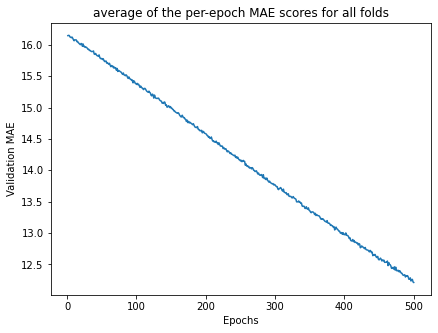

mae:  7.289346218109131


In [18]:
model = Sequential()
model.add(tf.keras.layers.LSTM(32, dropout=0.1, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer= tf.keras.optimizers.RMSprop(lr = 0.0001), loss='mse', metrics=['mae'])
mean_score = k_fold_val(model)

results = model.evaluate(x_test, y_test, verbose=0)
print('mae: ', results[1])

### SUMMARY 
<ul>
  <li>The best accuracy for Imdb dataset is <b> EXPT 10 :test accuracy : 87.70%</b></li>
  <li>The best accuracy for Reuster dataset is <b>Expt 12: Reuters, Using 2 SimpleRNN layers test accuracy is 36.19% </b> </li>
  <li>The best accuracy for <b> The Boston house price prediction is EXPT 14 Using SimpleRnn where mae: 3.55 </b> </li>
</ul>